In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

In [3]:
''' defining functions used later within the notebook '''

def str_to_percent(word):
    str_num = re.findall("\d+\.\d+", word)
    if not str_num:
        str_num = re.findall("\d+", word)
    return float(str_num[0]) / 100

def map_hours(df):
    hour_map = {'Not at all': 0, 'Less than 1 hour': 1, '1-2 hours': 2, '3 or more hours': 3}
    df = df.applymap(lambda x: hour_map.get(x) if x in hour_map else x)
    return df

def calc_s(x,y):
    c = Counter(zip(x,y))
    s = [c[(xx,yy)] for xx,yy in zip(x,y)]
    return s

In [4]:
df = pd.read_csv("../data/maps-synthetic-data-v1.1.csv")
df.head()

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,...,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,2,2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
2,3,3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,4,4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
4,5,5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,...,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A


Looking into negative correlation from dep_score and others

Dep_score = Child's depression score on CIS-R at 17.5 years old.

Columns thought to be negatively correlated:

musi_week = Average time child spent per day playing musical instruments on a typical weekday

musi_wend = Average time child spent per day playing musical instruments on a typical weekend day

read_week = Average time child spent per day reading books for pleasure on a typical weekday

read_wend = Average time child spent per day reading books for pleasure on a typical weekend day

out_sum_week = Average time child spent per day out of doors in summer on a typical weekday

out_sum_wend = Average time child spent per day out of doors in summer on a typical weekend day

out_win_week = Average time child spent per day out of doors in winter on a typical weekday

out_win_wend = Average time child spent per day out of doors in winter on a typical weekend day

In [5]:
columns = ['dep_score', 'musi_week', 'musi_wend', 
           'read_week', 'read_wend', 'out_sum_week', 
           'out_sum_wend', 'out_win_week', 'out_win_wend']

In [6]:
df3 = df[columns]
df3.head()

,dep_score,musi_week,musi_wend,read_week,read_wend,out_sum_week,out_sum_wend,out_win_week,out_win_wend
0,0.0,Not at all,Not at all,Less than 1 hour,Less than 1 hour,3 or more hours,3 or more hours,3 or more hours,3 or more hours
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Not at all,Not at all,1 or more hours,1 or more hours,Less than 3 hours,Less than 3 hours,Less than 1 hour,Less than 1 hour


In [7]:
# Shamelessly stolen from Isabella
# replace nan with -1 -> to keep them recognisable
df3 = df3.fillna(-1)

# make all columns a category -> even the numerical ones as they are not continous numbers
df3 = df3.astype('category')
# use pd's codes to make them numeric -> -1 disappears this way
df = df3.apply(lambda x: x.cat.codes)
df = df.astype('int')
df.columns

Index(['dep_score', 'musi_week', 'musi_wend', 'read_week', 'read_wend',
       'out_sum_week', 'out_sum_wend', 'out_win_week', 'out_win_wend'],
      dtype='object')

<AxesSubplot:xlabel='out_win_wend', ylabel='dep_score'>

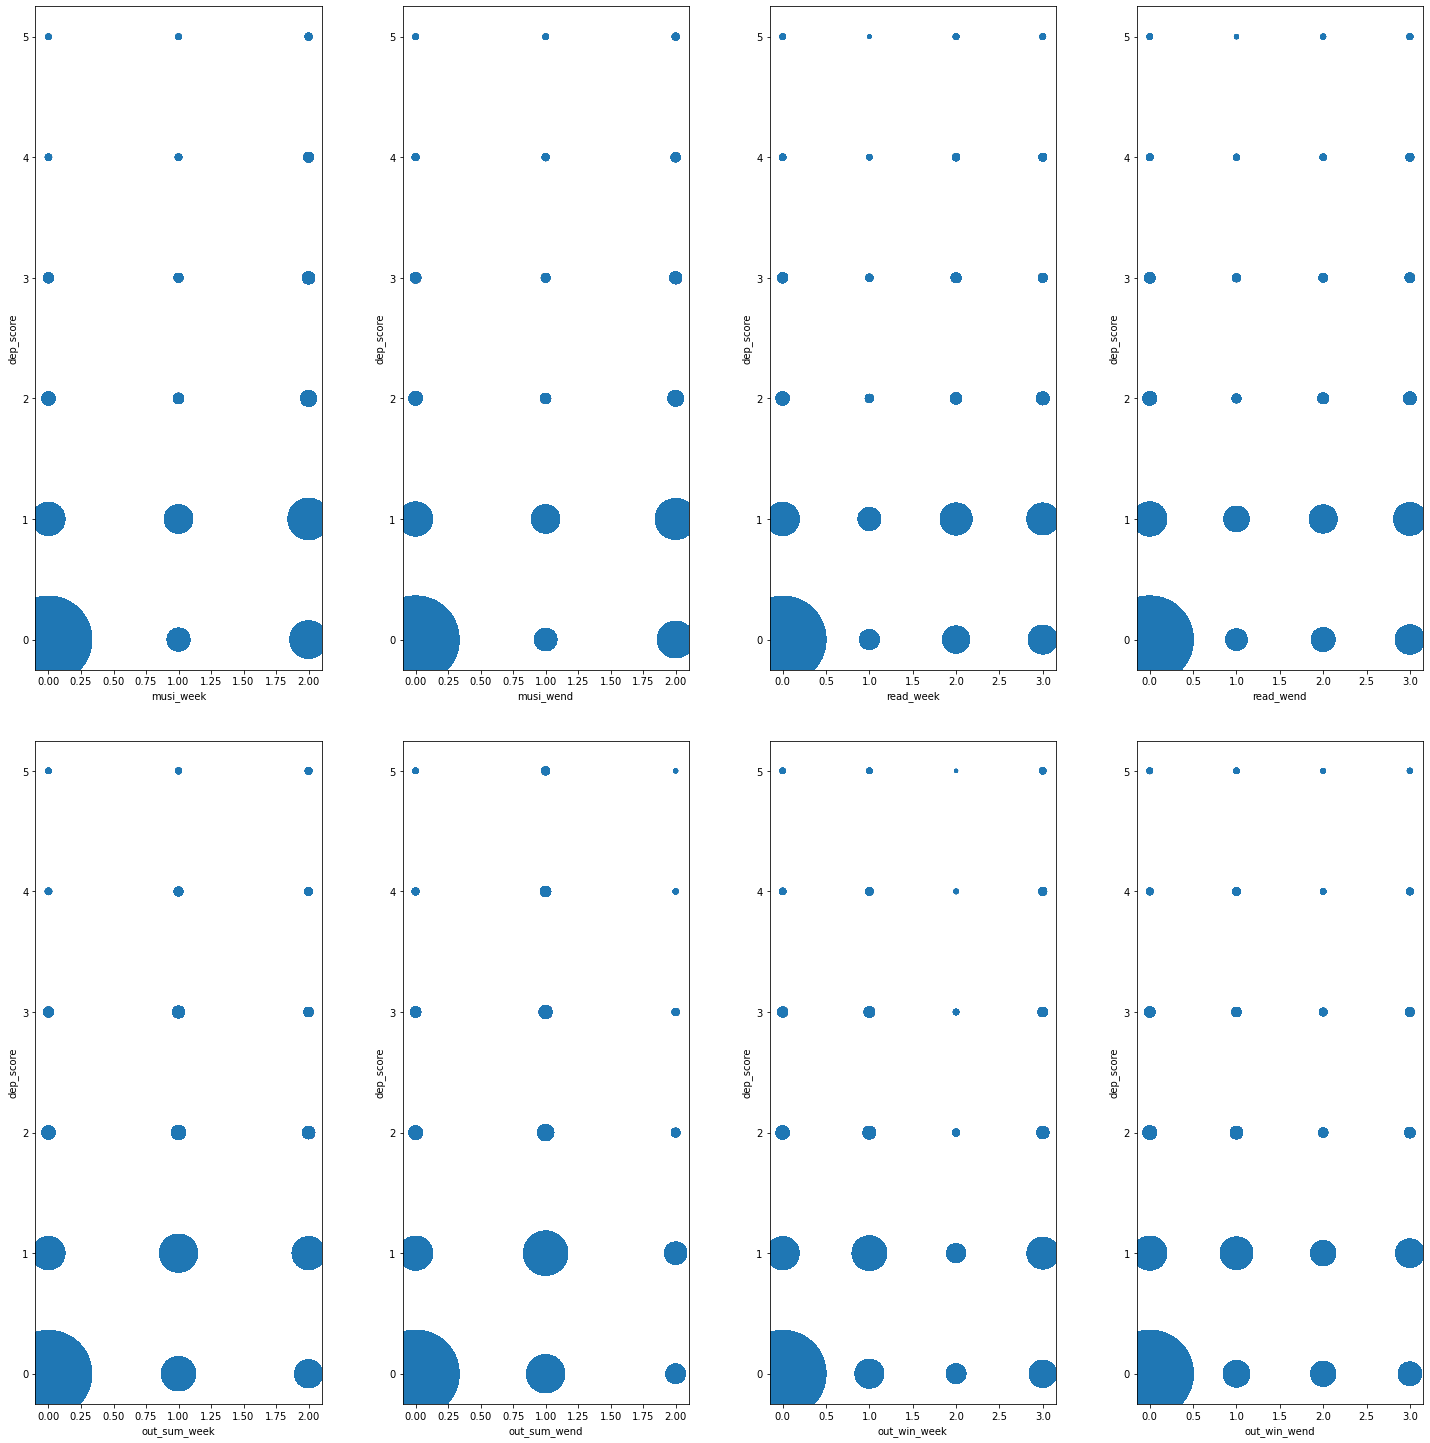

In [9]:
x = df['dep_score']

plt.rcParams["figure.figsize"] = [20, 20]

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.tight_layout(h_pad=5, w_pad=5)

y = df['musi_week']
df.plot(kind='scatter', x='musi_week',y='dep_score',s=calc_s(x,y), ax=axes[0,0])
y = df['musi_wend']
df.plot(kind='scatter', x='musi_wend',y='dep_score',s=calc_s(x,y), ax=axes[0,1])
y = df['read_week']
df.plot(kind='scatter', x='read_week',y='dep_score',s=calc_s(x,y), ax=axes[0,2])
y = df['read_wend']
df.plot(kind='scatter', x='read_wend',y='dep_score',s=calc_s(x,y), ax=axes[0,3])
y = df['out_sum_week']
df.plot(kind='scatter', x='out_sum_week',y='dep_score',s=calc_s(x,y), ax=axes[1,0])
y = df['out_sum_wend']
df.plot(kind='scatter', x='out_sum_wend',y='dep_score',s=calc_s(x,y), ax=axes[1,1])
y = df['out_win_week']
df.plot(kind='scatter', x='out_win_week',y='dep_score',s=calc_s(x,y), ax=axes[1,2])
y = df['out_win_wend']
df.plot(kind='scatter', x='out_win_wend',y='dep_score',s=calc_s(x,y), ax=axes[1,3])

In [10]:
cov_matrix = df.cov()
cov_matrix.head()

,dep_score,musi_week,musi_wend,read_week,read_wend,out_sum_week,out_sum_wend,out_win_week,out_win_wend
dep_score,0.739026,0.265108,0.257157,0.351147,0.340661,0.231853,0.190011,0.315783,0.299664
musi_week,0.265108,0.745933,0.703997,0.881337,0.848901,0.545781,0.449642,0.749282,0.715987
musi_wend,0.257157,0.703997,0.730056,0.848593,0.863679,0.526844,0.457864,0.725898,0.727402
read_week,0.351147,0.881337,0.848593,1.338274,1.248148,0.711709,0.589937,0.989988,0.942528
read_wend,0.340661,0.848901,0.863679,1.248148,1.325653,0.678600,0.593734,0.946771,0.948102


<AxesSubplot:>

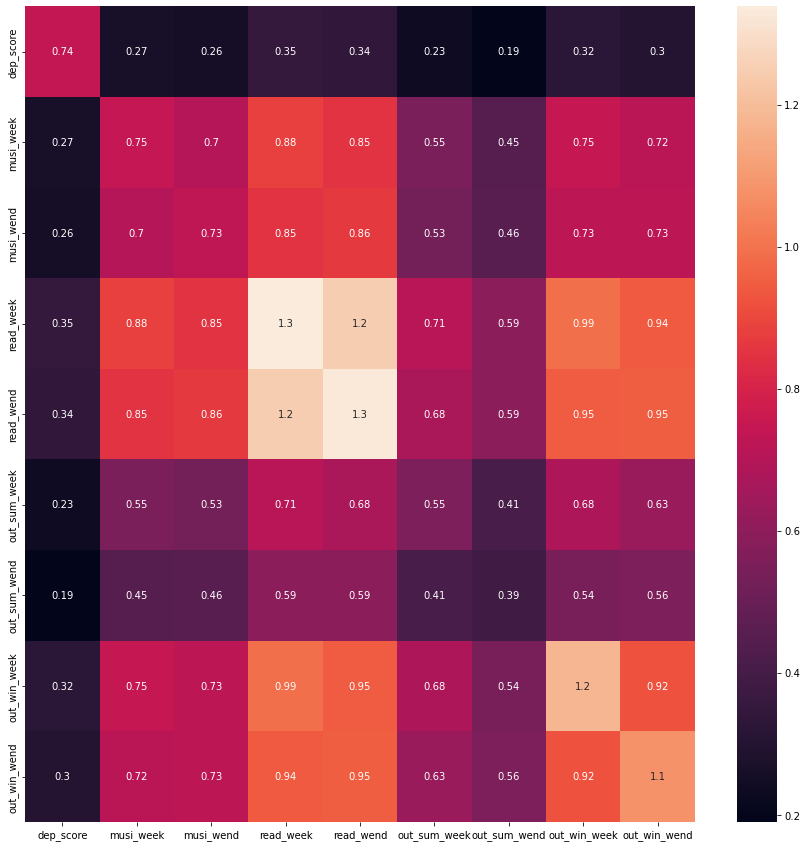

In [11]:
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
sns.heatmap(cov_matrix, annot=True)

<AxesSubplot:>

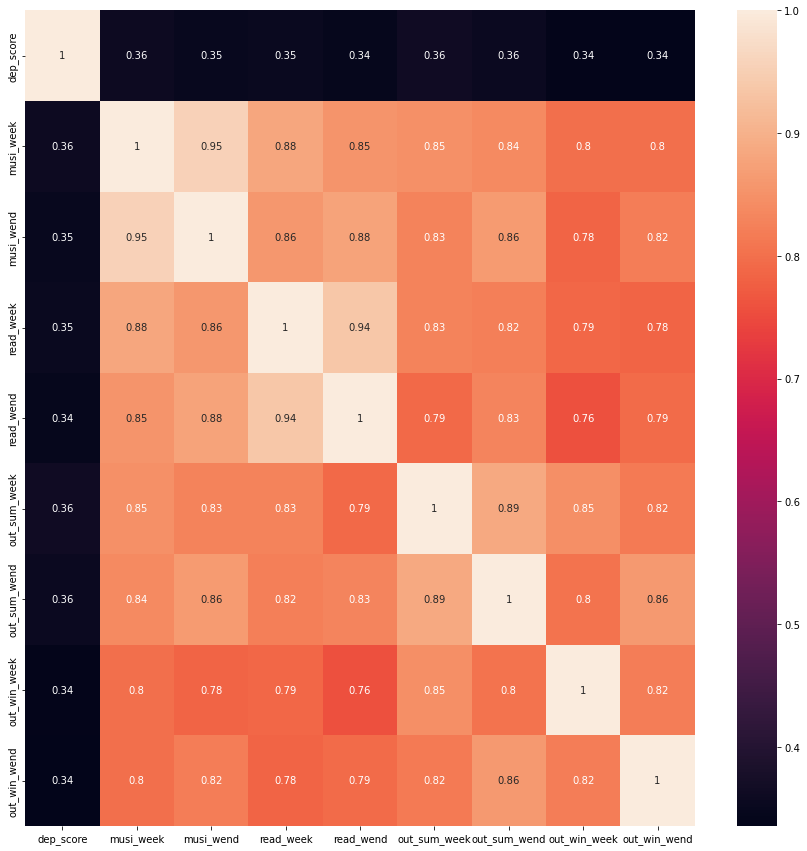

In [13]:
# Correlation matrix
corr_matrix = df.corr()#method='spearman')
plt.rcParams["figure.figsize"] = [15, 15]
sns.heatmap(corr_matrix, annot=True)